In [ ]:
# Scrap data from swiggy

from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd

url = "https://www.swiggy.com/restaurants/cm-briyani-manapakkam-chennai-19205"
p = requests.get(url)
soup = BeautifulSoup(p.content,'html.parser')
print(p)
content = soup.find_all('div', class_="_2wg_t")
fheader = ["Food_Name","Price"]

itemfull = []

for item in content:
  items = []
  Food_name = item.find('h3', class_="styles_itemNameText__3ZmZZ")
  price = item.find('div', class_="styles_itemPortionContainer__1u_tj")
  
  
  if(Food_name is not None):
    items.append(Food_name.text)
  else:
    items.append("Food_name is NA")
  if(price is not None):
    items.append(price.text)
  else:
    items.append("No Original Price")
  
  itemfull.append(items)

pd.DataFrame(itemfull).to_csv("food.csv",header=fheader)


<Response [200]>


In [ ]:
#Read the csv file
data = pd.read_csv("food.csv")

In [ ]:
data.head()

,Unnamed: 0,Food_Name,Price
0,0,Plain Dosa,50
1,1,Masala Dosa,60
2,2,Afghani Chicken,259
3,3,Grilled Chicken,249
4,4,Chettinad Chicken Masala,196


In [ ]:
df= data.head(10)
df

,Unnamed: 0,Food_Name,Price
0,0,Plain Dosa,50
1,1,Masala Dosa,60
2,2,Afghani Chicken,259
3,3,Grilled Chicken,249
4,4,Chettinad Chicken Masala,196
5,5,Kaadai Chicken,193
6,6,Dal Fry,98
7,7,Plain Biryani,125
8,8,Chicken Biryani,179
9,9,Chicken 65 Biryani,189


*1. Matplotlib*

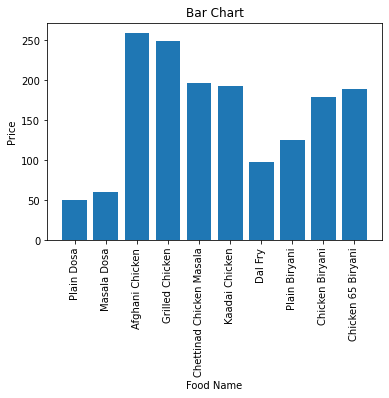

This chart is showing the price of different food


In [ ]:
#Bar Chart
import matplotlib.pyplot as plt
import numpy as np
y=df.Price
x=df.Food_Name
plt.xticks(rotation='vertical')
plt.ylabel("Price")
plt.xlabel("Food Name")
plt.title("Bar Chart")
plt.bar(x,y)
plt.show()
print("This chart is showing the price of different food")

Box plot for Price


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


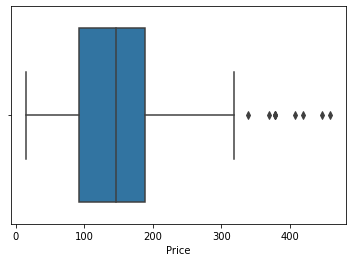

In [ ]:
#Box plot
import seaborn as sns
sns.boxplot(data["Price"])
print("Box plot for Price")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Violin Plot for Price of food


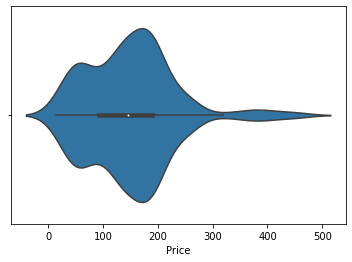

In [ ]:
#Violin Plot
sns.violinplot(data['Price'])
print("Violin Plot for Price of food")

This Graphs infers that the max food price is lies between 100 to 200


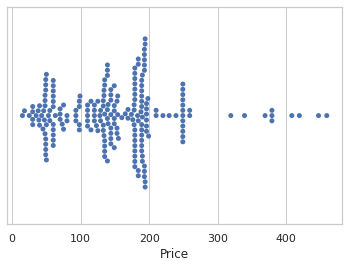

In [ ]:
#Swarm Plot
sns.swarmplot(x = data["Price"])
print("This Graphs infers that the max food price is lies between 100 to 200")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


This graph inferms that the max food items price are different and the three food items price is 179


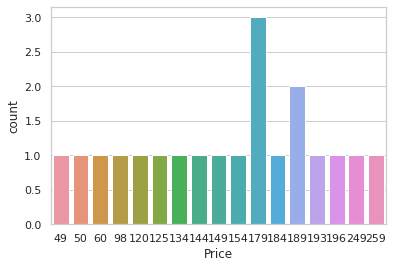

In [ ]:
#Count plot
df1=data.head(20)
sns.countplot(df1["Price"])
print("This graph inferms that the max food items price are different and the three food items price is Rs 179")